# Audible Insights: Book Recommendation System 

## Data Preparation, Data Cleaning & EDA

###  Importing Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')

 🔹 Import essential Python libraries for data manipulation (`pandas`, `numpy`) and data visualization (`matplotlib`, `seaborn`).



###  Load the Datasets

In [2]:
# Load datasets (update with actual file paths)
df_catalog = pd.read_csv('Audible_Catlog.csv')  
df_adv_features = pd.read_csv('Audible_Catlog_Advanced_Features.csv')  

🔹 Load the two datasets into DataFrames:  
- `df_catalog` contains basic book metadata.  
- `df_adv_features` contains enhanced attributes like processed features.


### Data Preprocessing

In [3]:
# Display first few rows for both the datasets

df_catalog.head()

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0


🔹 Display the first 5 rows of `df_catalog` to understand the structure and sample values.


In [4]:
df_adv_features.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


🔹 Display the first 5 rows of `df_adv_features` to examine what additional features are available.


In [5]:
# Merging the Datasetes

merged_df = pd.merge(df_catalog,df_adv_features, on=['Book Name', 'Author'], how='inner')
merged_df.head()

,Book Name,Author,Rating_x,Number of Reviews_x,Price_x,Rating_y,Number of Reviews_y,Price_y,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


🔹 Merge the two datasets using an inner join on `Book Name` and `Author`, so that only matching rows from both datasets are included.  
This ensures a clean unified dataset for further processing.



In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Book Name            4251 non-null   object 
 1   Author               4251 non-null   object 
 2   Rating_x             4251 non-null   float64
 3   Number of Reviews_x  3838 non-null   float64
 4   Price_x              4249 non-null   float64
 5   Rating_y             4251 non-null   float64
 6   Number of Reviews_y  3839 non-null   float64
 7   Price_y              4251 non-null   int64  
 8   Description          4245 non-null   object 
 9   Listening Time       4251 non-null   object 
 10  Ranks and Genre      4251 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 365.4+ KB


🔹 Display basic information about the merged dataset:  
Includes column names, data types, non-null counts, and total rows.


In [7]:
# Checking if there are any differences between Rating_x and Rating_y columns.
print((merged_df['Rating_x'] != merged_df['Rating_y']).sum())


124


🔹 Check how many rows have different rating values from both original sources (`Rating_x` and `Rating_y`).  
This helps assess consistency between datasets before dropping duplicates.



In [8]:
#Checking for difference between Number of Reviews_x and Number of Reviews_y columns.
print((merged_df['Number of Reviews_x'] != merged_df['Number of Reviews_y']).sum())


2910


🔹 Compare the `Number of Reviews_x` and `Number of Reviews_y` columns to check for inconsistencies between the two source datasets.  
This line prints the count of rows where the number of reviews does not match.  
It helps in deciding whether to drop or retain one of the columns based on reliability.


In [9]:
#Checking for difference between Price_x and Price_y columns.
print((merged_df['Price_x'] != merged_df['Price_y']).sum())

19


🔹 Compare the `Price_x` and `Price_y` columns to identify any discrepancies in book pricing between the two merged datasets.  
This line prints the count of rows where the price values differ, allowing us to verify consistency before finalizing which column to keep.


In [10]:
# Merging the Rating_x and Rating_y as Rating by calculating mean and dropping both the columns
merged_df['Rating'] = merged_df[['Rating_x', 'Rating_y']].mean(axis=1)
merged_df.drop(columns = ['Rating_x', 'Rating_y'], inplace=True)


🔹 Combine `Rating_x` and `Rating_y` by calculating their row-wise average and store it in a new column called `Rating`.  
This ensures a more balanced and accurate rating value if the two sources differ slightly.  
Then, drop the original `Rating_x` and `Rating_y` columns as they are no longer needed.


In [11]:
# Merging the Number of Reviews_x and Number of Reviews_y as Number of Reviews by calculating mean and dropping both the columns
merged_df['Number of Reviews'] = merged_df[['Number of Reviews_x', 'Number of Reviews_y']].mean(axis=1)
merged_df.drop(columns = ['Number of Reviews_x', 'Number of Reviews_y'], inplace=True)


🔹 Combine `Number of Reviews_x` and `Number of Reviews_y` by taking their row-wise average and assign the result to a new column `Number of Reviews`.  
This helps consolidate review counts from both sources into a single, unified value.  
Then, remove the original `_x` and `_y` columns to avoid redundancy.


In [12]:
merged_df['Price'] = merged_df[['Price_x', 'Price_y']].mean(axis=1)
merged_df.drop(columns=['Price_x', 'Price_y'], inplace=True)

🔹 Calculate the average of `Price_x` and `Price_y` for each row and store it in a new column called `Price`.  
This merges the price information from both datasets into one consistent value.  
The original `Price_x` and `Price_y` columns are then dropped to keep the dataset clean and avoid duplication.


In [13]:
merged_df.isnull().sum()

Book Name              0
Author                 0
Description            6
Listening Time         0
Ranks and Genre        0
Rating                 0
Number of Reviews    411
Price                  0
dtype: int64

🔹 Check for missing (null) values in each column of the merged dataset.  
This helps identify if any further data cleaning is needed before proceeding to analysis or modeling.


In [14]:
# Fill missing column 'Description' with a default message
merged_df['Description'].fillna('Not Available', inplace=True)

🔹 Fill any missing values in the `Description` column with the default text `"Not Available"`.  
This ensures that there are no null values in this important text field, which is required for NLP processing later.


In [15]:
#Fill missing column 'Number of Reviews' with median
merged_df['Number of Reviews'].fillna(merged_df['Number of Reviews'].median(), inplace=True)

🔹 Fill missing values in the `Number of Reviews` column using the column's median.  
Using the median is a robust strategy as it reduces the effect of outliers and maintains data integrity for further analysis.


In [16]:
merged_df.isnull().sum()

Book Name            0
Author               0
Description          0
Listening Time       0
Ranks and Genre      0
Rating               0
Number of Reviews    0
Price                0
dtype: int64

🔹 Recheck for any remaining missing (null) values in the dataset after applying the fill operations.  
This ensures that the dataset is now completely clean and ready for analysis or modeling.


In [17]:
merged_df.head()

,Book Name,Author,Description,Listening Time,Ranks and Genre,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top...",4.9,342.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top...",4.6,3670.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top...",4.4,20240.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top...",4.6,4646.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top...",4.6,4305.0,1005.0


🔹 Display the first 5 rows of the cleaned and merged dataset to verify that all preprocessing steps like merging, filling missing values, and column cleanup — have been successfully applied.


#### Standardizing Data Formats

 Convert Listening Time to minutes.



In [18]:
merged_df['Listening Time'].value_counts()


Listening Time
-1                         2143
9 hours and 21 minutes       11
23 minutes                    9
11 hours and 4 minutes        9
6 hours and 23 minutes        8
                           ... 
9 hours and 45 minutes        1
3 hours and 13 minutes        1
15 hours and 55 minutes       1
14 hours and 13 minutes       1
14 hours and 53 minutes       1
Name: count, Length: 970, dtype: int64

🔹 Display the count of each unique value in the `Listening Time` column.  
This helps understand how frequently different listening durations appear and can reveal common or outlier values in the dataset.

🔹 The value counts for the `Listening Time` column show that the most frequent value is `-1`, occurring 2143 times, indicating missing or unknown durations.  
Other values like `"9 hours and 21 minutes"` or `"23 minutes"` represent actual audiobook lengths.  
This suggests that a large portion of records are missing proper listening time and may need further cleaning or exclusion based on project needs.


In [19]:
# Replacing -1 with NaN, to handle missing values properly

merged_df['Listening Time'] = merged_df['Listening Time'].replace('-1', np.nan)


🔹 Replace all occurrences of `-1` in the `Listening Time` column with `NaN` to properly represent missing values.  


In [20]:
# Function to convert 'Listening Time' to Minutes
import re

def convert_to_minutes(time_str):
    if pd.isnull(time_str) or time_str.strip() == "":
        return np.nan  # Handle missing values

    time_str = str(time_str).lower().strip()

    # Extract hours and minutes using regex
    match_hours = re.search(r'(\d+)\s*hour', time_str)
    match_minutes = re.search(r'(\d+)\s*minute', time_str)

    hours = int(match_hours.group(1)) if match_hours else 0
    minutes = int(match_minutes.group(1)) if match_minutes else 0

    return hours * 60 + minutes  # Convert total time to minutes

# Apply function to Listening Time
merged_df['Listening Time (Minutes)'] = merged_df['Listening Time'].apply(convert_to_minutes)

# Drop original column (optional)
merged_df.drop(columns=['Listening Time'], inplace=True)

# Check results
merged_df[['Book Name', 'Listening Time (Minutes)']].head(10)



,Book Name,Listening Time (Minutes)
0,Think Like a Monk: The Secret of How to Harnes...,654.0
1,Ikigai: The Japanese Secret to a Long and Happ...,203.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,317.0
3,Atomic Habits: An Easy and Proven Way to Build...,335.0
4,Life's Amazing Secrets: How to Find Balance an...,385.0
5,Extraordinary Leadership,66.0
6,Sapiens,918.0
7,Sapiens,1302.0
8,The Intelligent Investor Rev Ed.,1068.0
9,Rich Dad Poor Dad: What the Rich Teach Their K...,369.0


🔹 Define and apply a custom function `convert_to_minutes()` to transform the `Listening Time` column into a consistent numerical format (total minutes).

- The function uses regular expressions to extract hours and minutes from strings like `"9 hours and 21 minutes"`.
- It converts the time into total minutes for easier analysis and modeling.
- Missing or invalid entries are safely handled by returning `NaN`.

🔹 After conversion, a new column `Listening Time (Minutes)` is created, and the original string-based `Listening Time` column is dropped to avoid redundancy.

🔹 Finally, display the first 10 records to verify the results of the transformation.


In [21]:
# Extracting Rank & Genre Separately
merged_df['Ranks and Genre'].value_counts()

Ranks and Genre
-1                                                                                                                                                                                                                                   2143
,          5 star,        ,          (0%),        ,          ,            0%,          ,                                                                                                                                               19
,#36 Free in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#1 in Personal Success                                                                                                                      4
,#768 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#7 in Creativity,#33 in Philosophy (Audible Audiobooks & Originals),#131 in Personal Success                                                    4
,#4,773 in Audible Audiobooks & Originals (See T

🔹 The `Ranks and Genre` column contains mixed data, including Audible ranking positions and genre/category labels.

🔹 First, we use `.value_counts()` to explore the different unique combinations in this column.  
The output reveals that:
- A large number of entries (2143) have the value `-1`, indicating missing or invalid data.
- Some records contain multiple rankings and genre classifications, separated by commas.
- These rankings typically look like `#36 in Personal Success`, `#4,773 in Audible Audiobooks`, etc.

🔹 This exploratory step helps assess the quality and variety of information in the column before we separate it into meaningful features such as `Rank` and `Genre`.

In [22]:
# Defining a function to extract the rank number
def extract_rank(rank_str):
    match = re.search(r'#(\d+)', rank_str)  # Search for a number preceded by '#'
    if match:
        return int(match.group(1))  # Return the number as an integer
    else:
        return np.nan  # If no match is found, return NaN


🔹 Define a function `extract_rank()` that extracts the first ranking number from the `Ranks and Genre` column using regular expressions.

- The regex pattern `#(\d+)` searches for a number that appears after a `#` symbol (e.g., `#36`).
- If a match is found, the number is extracted and returned as an integer.
- If no rank is present in the string, the function returns `NaN`.

This function prepares the data for converting mixed text into a clean, numeric `Rank` feature useful for analysis or modeling.


In [23]:
# Applying the extraction function to the 'Rank' column
merged_df['Rank'] = merged_df['Ranks and Genre'].apply(extract_rank)


🔹 Apply the `extract_rank()` function to each row in the `Ranks and Genre` column to extract the first rank number.

- The result is stored in a new column called `Rank`.
- This transforms unstructured text data into a structured numerical format, making it suitable for analysis and comparison.


In [24]:
merged_df['Rank'].fillna(-1, inplace=True)

🔹 Fill any missing values (`NaN`) in the newly created `Rank` column with `-1`.  
This ensures the column remains numeric and consistent, making it easier to filter or visualize later without encountering null-related errors.


In [25]:
merged_df['Rank'] = merged_df['Rank'].astype('int')

🔹 Convert the `Rank` column data type from float (due to earlier NaNs) to integer.  
Since missing values were replaced with `-1`, all values are now valid integers, allowing for cleaner analysis and performance optimization.


In [26]:
# Now, Checking the Rank Column after cleaning
merged_df[['Rank','Book Name']].head()

,Rank,Book Name
0,1,Think Like a Monk: The Secret of How to Harnes...
1,2,Ikigai: The Japanese Secret to a Long and Happ...
2,3,The Subtle Art of Not Giving a F*ck: A Counter...
3,5,Atomic Habits: An Easy and Proven Way to Build...
4,6,Life's Amazing Secrets: How to Find Balance an...


🔹 Display the first few rows of the cleaned `Rank` column alongside the corresponding `Book Name` to verify that the rank extraction and cleaning process was successful.  
This helps confirm that each book now has a properly formatted numerical rank.


In [27]:
merged_df['Ranks and Genre'].unique()

array([',#1 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#1 in Personal Success,#1 in Stress Management,#2 in Society & Culture (Books)',
       ',#2 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#1 in Meditation (Audible Audiobooks & Originals),#1 in Self-Esteem,#2 in Personal Success',
       ',#3 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#3 in Personal Success,#16 in Personal Development & Self-Help',
       ...,
       ',#582 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#1 in Climate Change,#3 in Earth Sciences (Audible Audiobooks & Originals),#4 in Future Studies',
       ',#2,060 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#302 in Personal Success,#4,331 in Personal Development & Self-Help',
       ',#1,655 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#1 in L

🔹 Display all unique values in the `Ranks and Genre` column to understand the types of information it contains.  
Each entry includes a combination of Audible ranks (e.g., `#1 in Personal Success`) and associated genres or categories.

This step helps:
- Identify patterns in the structure of the data.
- Understand how multiple genres or ranks are stored together in one string.
- Prepare for further parsing if needed (e.g., extracting genre labels).

Observations:
- Many entries contain multiple rankings and genres, separated by commas.
- Some entries use large numbers (e.g., `#4,331`) indicating overall rank in a broader category.


In [28]:
# Printing the first few entries in the 'Ranks and Genre' column to inspect the raw data
print(merged_df['Ranks and Genre'].head())

0    ,#1 in Audible Audiobooks & Originals (See Top...
1    ,#2 in Audible Audiobooks & Originals (See Top...
2    ,#3 in Audible Audiobooks & Originals (See Top...
3    ,#5 in Audible Audiobooks & Originals (See Top...
4    ,#6 in Audible Audiobooks & Originals (See Top...
Name: Ranks and Genre, dtype: object


🔹 Print the first few entries in the `Ranks and Genre` column to manually inspect the structure of the raw data.  
This helps understand how ranking and genre information is stored—typically as a comma-separated string with multiple categories.

Observation:
- Each entry starts with a comma and includes multiple rankings such as `#1 in Personal Success`, `#2 in Self-Esteem`, etc.
- This preview guides how we can further extract or clean genre-specific information in the next steps.


In [29]:
# Defining a function to clean Genre data
def clean_genre(text):
    if pd.isna(text) or text == '-1':
        return None
    return text.split('in')[-1].strip() #Removing the leading comma and rank information

🔹 Define a function `clean_genre()` to extract and clean the genre information from the `Ranks and Genre` column.

- If the value is missing (`NaN`) or marked as `-1`, it returns `None`.
- Otherwise, it splits the string at the word `'in'` and returns the last part, which typically contains the genre/category name.
- This helps isolate the genre by removing unnecessary rank and formatting information.

This function prepares genre data for a cleaner and more readable `Genre` column.


In [30]:
# Applying the function to 'Genre' column
merged_df['Genre'] = merged_df['Ranks and Genre'].apply(clean_genre)

🔹 Apply the `clean_genre()` function to each row in the `Ranks and Genre` column to extract the genre or category.  
The result is stored in a new column called `Genre`, providing a clean and simplified version of the book’s category for analysis and filtering.

This step separates meaningful genre information from the complex combined text format.


In [31]:
merged_df['Genre']

0              Society & Culture (Books)
1                       Personal Success
2       Personal Development & Self-Help
3                       Personal Success
4                           Spiritualism
                      ...               
4246                                None
4247                                None
4248                                None
4249                                None
4250                                None
Name: Genre, Length: 4251, dtype: object

🔹 Display the contents of the newly created `Genre` column to verify that genre/category extraction was successful.

Observations:
- For most rows, genres like `Society & Culture (Books)`, `Personal Success`, and `Spiritualism` have been extracted cleanly.
- Some rows still show `None`, indicating that genre data was either missing or could not be extracted from the original string.

This confirms that the `Genre` column is now usable for grouping, filtering, or recommending books based on category.


In [32]:
# Now, Let's drop the 'Ranks and Genre' Column
merged_df.drop(columns=['Ranks and Genre'], inplace = True)

🔹 Drop the original `Ranks and Genre` column since its useful information (rank and genre) has already been extracted and stored in separate columns (`Rank` and `Genre`).  
This helps keep the dataset clean, focused, and free of redundant or unstructured data.


In [33]:
merged_df.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books)
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,335.0,5,Personal Success
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,385.0,6,Spiritualism


In [34]:
merged_df.dtypes

Book Name                    object
Author                       object
Description                  object
Rating                      float64
Number of Reviews           float64
Price                       float64
Listening Time (Minutes)    float64
Rank                          int32
Genre                        object
dtype: object


🔹 Display the first 5 rows of the final cleaned dataset using `merged_df.head()`.

This helps verify that all preprocessing steps—merging, handling missing values, transforming columns, and extracting rank and genre—have been successfully completed and the data is ready for further analysis or modeling.


In [35]:
merged_df.duplicated().sum()

658

In [36]:
merged_df = merged_df.drop_duplicates()

In [37]:
merged_df.shape

(3593, 9)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3593 non-null   object 
 1   Author                    3593 non-null   object 
 2   Description               3593 non-null   object 
 3   Rating                    3593 non-null   float64
 4   Number of Reviews         3593 non-null   float64
 5   Price                     3593 non-null   float64
 6   Listening Time (Minutes)  1890 non-null   float64
 7   Rank                      3593 non-null   int32  
 8   Genre                     1890 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 266.7+ KB


In [39]:
merged_df['Listening Time (Minutes)'].fillna(merged_df['Listening Time (Minutes)'].median(), inplace=True)


🔹 Fill missing values in the `Listening Time (Minutes)` column using the median of the column.  
Using the median is a robust choice because it minimizes the effect of outliers and ensures that the listening time field has no null values before further analysis or modeling.


In [40]:
merged_df.isnull().sum()

Book Name                      0
Author                         0
Description                    0
Rating                         0
Number of Reviews              0
Price                          0
Listening Time (Minutes)       0
Rank                           0
Genre                       1703
dtype: int64

🔹 Check for any remaining missing (null) values in the cleaned dataset using `.isnull().sum()`.

**Output Interpretation:**
- All key numerical and text-based columns (`Book Name`, `Author`, `Description`, `Rating`, `Number of Reviews`, `Price`, `Listening Time (Minutes)`, `Rank`) now have **zero missing values**, confirming successful data cleaning.
- However, the `Genre` column still has **1703 missing entries**, which indicates that genre information could not be extracted from the original `Ranks and Genre` field for those books. These missing genres may need to be handled or excluded depending on project goals.


In [41]:
merged_df.info()  


<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3593 non-null   object 
 1   Author                    3593 non-null   object 
 2   Description               3593 non-null   object 
 3   Rating                    3593 non-null   float64
 4   Number of Reviews         3593 non-null   float64
 5   Price                     3593 non-null   float64
 6   Listening Time (Minutes)  3593 non-null   float64
 7   Rank                      3593 non-null   int32  
 8   Genre                     1890 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 266.7+ KB


🔹 Display a summary of the dataset using `.info()` to confirm data types, non-null counts, and overall structure.

 Key Points:
- Total entries: 3593
- All essential columns like `Book Name`, `Author`, `Description`, `Rating`, `Number of Reviews`, `Price`, and `Listening Time (Minutes)` have **no missing values**.
- `Genre` has **1890 non-null values**, confirming that **1703 entries still lack genre information**.
- Data types are correctly assigned:
  - Text columns (`object`)
  - Numeric columns (`float64`, `int32`)

 This ensures that the dataset is clean and well-structured, except for the missing genres which may be handled in further processing or filtered out for genre-based analysis.


In [42]:
merged_df.head(3)

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books)
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help


In [43]:
merged_df.to_csv("cleaned_data.csv", index = False)

🔹 Save the fully cleaned and processed dataset to a new CSV file named `cleaned_data.csv`.  
Setting `index=False` ensures that row indices are not written to the file, keeping the output clean and ready for use in further analysis, modeling, or app development.


In [44]:
merged_df.shape

(3593, 9)

### Exploratory Data analysis (EDA)

In [45]:
# Basic statistics
print(merged_df.describe())

            Rating  Number of Reviews         Price  Listening Time (Minutes)  \
count  3593.000000        3593.000000   3593.000000               3593.000000   
mean      3.928709        1084.623087    960.313387                547.399805   
std       1.638478        2917.043917   1686.574834                407.130550   
min      -1.000000           1.000000      0.000000                  0.000000   
25%       4.200000          91.500000    501.000000                463.000000   
50%       4.500000         267.250000    683.000000                486.500000   
75%       4.600000         868.000000    888.000000                503.000000   
max       5.000000       70099.500000  18290.000000               6139.000000   

              Rank  
count  3593.000000  
mean     73.085166  
std     199.787009  
min      -1.000000  
25%      -1.000000  
50%       1.000000  
75%       3.000000  
max     999.000000  


🔹 Used `.describe()` to generate descriptive statistics for all numerical columns in the cleaned dataset.

- **Rating**:  
  - Ranges from `-1` (possibly placeholder for invalid data) to `5.0`  
  - Median (`50%`) rating is `4.5`, indicating generally positive user reviews.

- **Number of Reviews**:  
  - Extremely skewed with a maximum of `70,099` reviews, while the median is only `267`.  
  - High standard deviation (`2917`) suggests presence of popular bestsellers.

- **Price**:  
  - Wide range from `₹0` to `₹18,290` with a high standard deviation, indicating diverse pricing.

- **Listening Time (Minutes)**:  
  - 🔹 Median duration is around `486.5` minutes (`approximately 8 hours`), but the maximum is `6139` minutes (`approximately 102 hours`), suggesting some exceptionally long audiobooks.


- **Rank**:  
  - Ranges from `-1` (missing or undefined rank) to `999`.  
  - Median rank is `1`, showing many books are top-ranked in their categories.

This summary provides valuable insights into the data distribution and helps in making informed decisions for further modeling and filtering.


##### Book Name Analysis

In [46]:
# Check for duplicate book names
print("Duplicate Books Names:", merged_df['Book Name'].duplicated().sum())

Duplicate Books Names: 245


🔹 Checked how many duplicate book titles exist in the `Book Name` column using `.duplicated().sum()`.  
This reveals that there are **245 duplicate book names**, meaning multiple entries share the same title.  

This could be due to:
- Different editions or versions of the same audiobook
- The same book listed under different categories or authors
- Data duplication in the original source

This insight helps decide whether to drop or retain duplicates based on project goals (e.g., keep all versions or deduplicate for clarity).


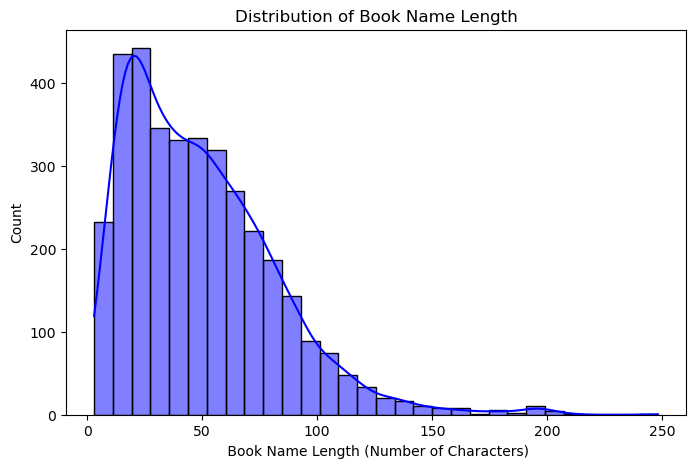

In [47]:
# Book Name Length Analysis

merged_df['Book Name Length'] = merged_df['Book Name'].apply(len)

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Book Name Length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Book Name Length")
plt.xlabel(" Book Name Length (Number of Characters)")
plt.ylabel("Count")
plt.show()
    


🔹 Created a new column `Book Name Length` that stores the number of characters in each book title using the `len()` function.

🔹 Plotted a histogram with KDE (kernel density estimate) to visualize the distribution of book name lengths.

**Observations:**
- Most book titles range between 20 and 70 characters.
- The distribution is **right-skewed**, indicating that while most titles are short to moderate in length, a few have very long names.
- This kind of analysis helps in understanding the text complexity or formatting consistency in book titles, which can be useful for feature engineering in NLP tasks.


In [48]:
# Counting Word Frequency in Book Names

from collections import Counter

# Splitting all book names into words
all_words = " ".join(merged_df['Book Name']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)


🔹 Analyzed word frequency in book titles to identify commonly used terms.

Steps:
- Combine all book titles into a single string using `" ".join(...)`.
- Split the combined string into individual words.
- Use Python’s `Counter` from the `collections` module to count how often each word appears.
- Convert the result into a `DataFrame` (`word_freq_df`) for easier sorting and visualization.

 This analysis helps reveal common themes or trends in book naming, such as frequent use of words like “Guide,” “Success,” or “Life.”


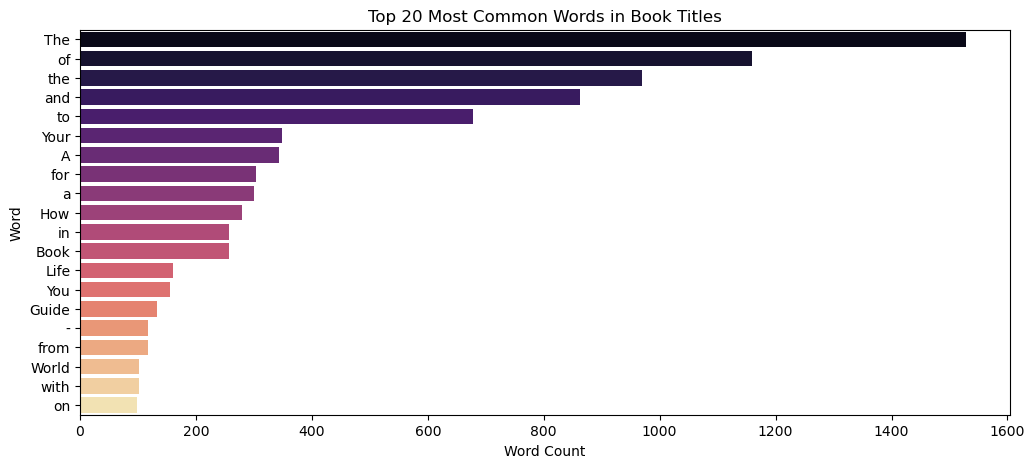

In [49]:
plt.figure(figsize=(12,5))
sns.barplot(x=word_freq_df['Count'].head(20), y=word_freq_df['Word'].head(20), palette="magma")
plt.title("Top 20 Most Common Words in Book Titles")
plt.xlabel("Word Count")
plt.ylabel("Word")
plt.show()


🔹 Visualize the top 20 most frequently occurring words in audiobook titles using a horizontal bar chart.

**Observations:**
- Common stopwords such as "The", "of", "and", "to", and "your" appear most frequently.
- Other meaningful words like "Life", "Book", "Guide", and "How" are also prominent, reflecting popular themes in book titles.

This analysis helps:
- Understand naming trends in audiobooks.
- Identify important or repetitive words that may be useful for NLP preprocessing (e.g., stopword removal or keyword extraction).


##### Author Anaysis

In [50]:
# Count unique authors
print("Unique Authors:", merged_df['Author'].nunique())

Unique Authors: 2303


In [51]:
author_counts = merged_df['Author'].value_counts()
author_counts

Author
Harvard Business Review    25
Devdutt Pattanaik          23
Rick Riordan               22
OSHO                       20
Robin Sharma               17
                           ..
Linda Sue Park              1
Tayari Jones                1
James Herriot               1
Kendall Ryan                1
Richard K. Bernstein        1
Name: count, Length: 2303, dtype: int64

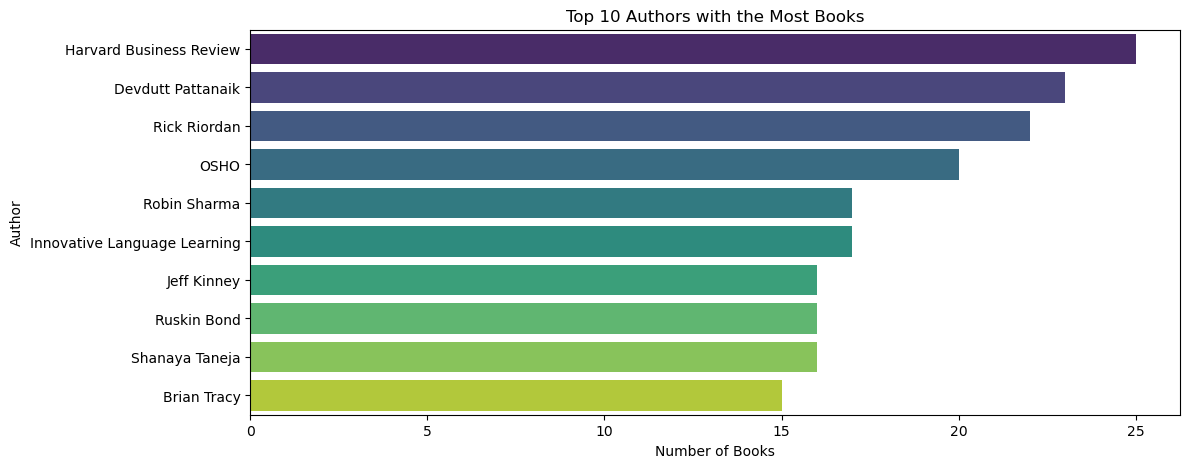

In [52]:
plt.figure(figsize=(12,5))
sns.barplot(x=author_counts.head(10).values, y=author_counts.head(10).index, palette="viridis")
plt.title("Top 10 Authors with the Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


🔹 Display a horizontal bar chart of the top 10 authors who have published the most audiobooks in the dataset.

**Observations:**
- Authors like **Harvard Business Review**, **Devdutt Pattanaik**, and **Rick Riordan** appear most frequently.
- This highlights prolific contributors and can guide recommendation strategies or popularity analysis.

 This visualization helps identify key content creators in the audiobook market and supports author-based filtering or ranking.


##### Description Analysis

In [53]:
# Checking for missing values in Description

print(f"Number of missing descriptions: {merged_df['Description'].isna().sum()}")


Number of missing descriptions: 0


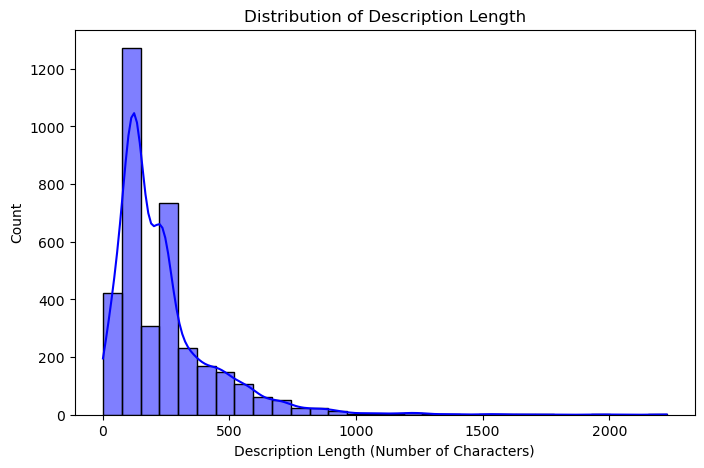

In [54]:
# Create a new column for description length
merged_df['Description Length'] = merged_df['Description'].fillna("").apply(len)

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Description Length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Description Length")
plt.xlabel("Description Length (Number of Characters)")
plt.ylabel("Count")
plt.show()

**Observation:**  
The distribution of audiobook description lengths is right-skewed, with most descriptions falling under 300 characters. The peak is observed around 100–150 characters, indicating that short descriptions are the most common. A few descriptions exceed 1000 characters, suggesting the presence of outliers or unusually detailed entries.


In [55]:
# Description Word count

# Combine all descriptions into one large string
all_desc_words = " ".join(merged_df['Description'].dropna()).split()

# Count word frequencies
desc_word_counts = Counter(all_desc_words)

# Convert to DataFrame for visualization
desc_word_freq_df = pd.DataFrame(desc_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

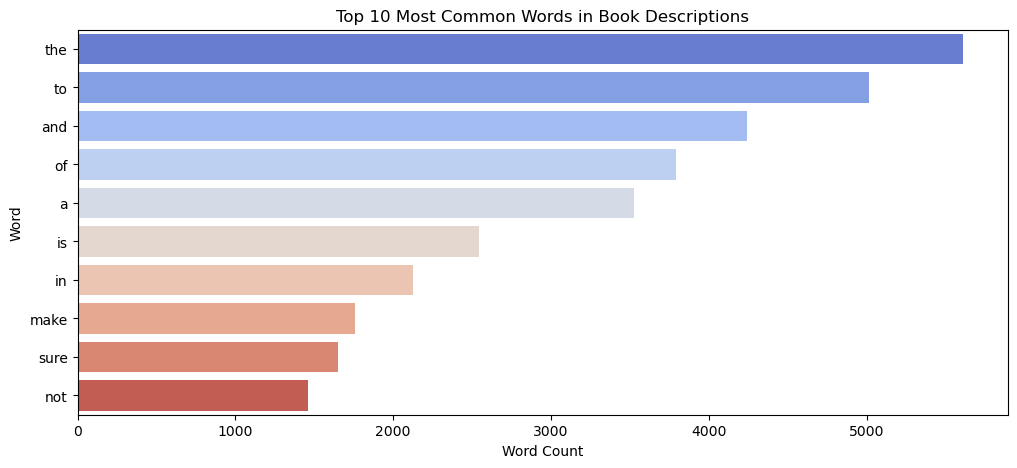

In [56]:
plt.figure(figsize=(12,5))
sns.barplot(x=desc_word_freq_df['Count'].head(10), y=desc_word_freq_df['Word'].head(10), palette="coolwarm")
plt.title("Top 10 Most Common Words in Book Descriptions")
plt.xlabel("Word Count")
plt.ylabel("Word")
plt.show()

**Observation:**  
The most frequently occurring words in book descriptions are common stopwords such as "the", "to", "and", "of", and "a". These are typical English function words and may not carry much semantic meaning. Words like "make", "sure", and "not" also appear in the top 10, indicating their frequent usage in persuasive or descriptive language. For meaningful analysis or modeling, it may be beneficial to remove such common stopwords.


##### Rating Analysis

In [57]:
merged_df['Rating'].describe()

count    3593.000000
mean        3.928709
std         1.638478
min        -1.000000
25%         4.200000
50%         4.500000
75%         4.600000
max         5.000000
Name: Rating, dtype: float64

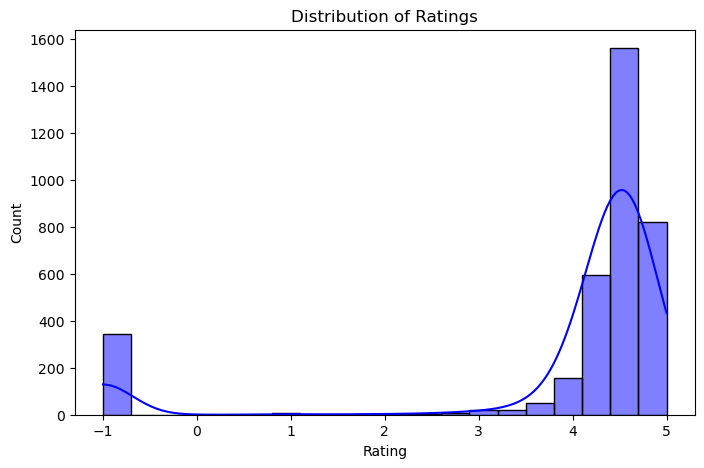

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Observation:**  
The distribution of audiobook ratings is right-skewed and centered around higher values, with most ratings falling between 4.0 and 5.0. This indicates generally positive user feedback. A significant number of entries are clustered near 4.5, suggesting strong overall satisfaction. A few entries have invalid or missing ratings (e.g., negative values), which should be addressed during data cleaning.


##### Number of Reviews

In [59]:
merged_df['Number of Reviews'].describe()


count     3593.000000
mean      1084.623087
std       2917.043917
min          1.000000
25%         91.500000
50%        267.250000
75%        868.000000
max      70099.500000
Name: Number of Reviews, dtype: float64

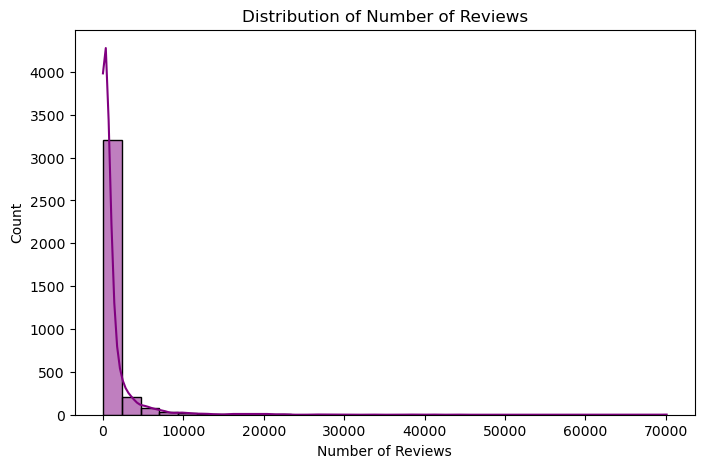

In [60]:
# Distribution of Reviews

plt.figure(figsize=(8,5))
sns.histplot(merged_df['Number of Reviews'], bins=30, kde=True, color='purple')
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()


**Observation:**  
The distribution of the number of reviews is highly right-skewed, with the majority of books receiving fewer than 5,000 reviews. A large concentration of books has under 1,000 reviews, indicating that most books have limited user engagement. However, there are a few extreme outliers with more than 60,000 reviews, which could significantly influence aggregate statistics and may require special handling during analysis.


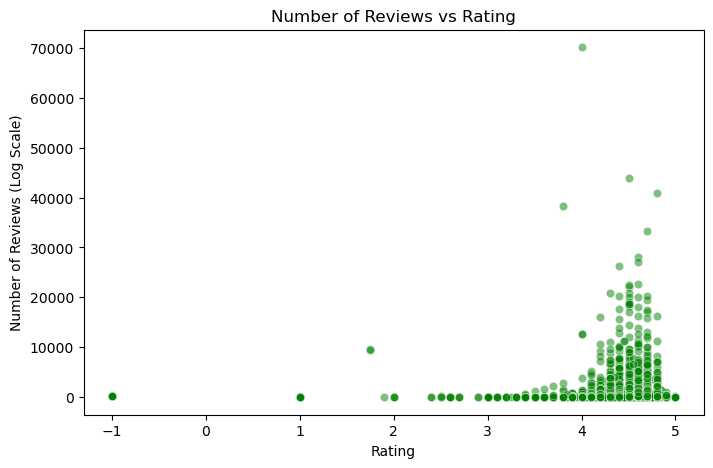

In [61]:
# Rating Vs Number of Reviews plot

plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_df['Rating'], y=merged_df['Number of Reviews'],alpha=0.5, color='green')
plt.title("Number of Reviews vs Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews (Log Scale)")
plt.show()

##### Price Analysis

In [62]:
# Summary Statistics for Price
print(merged_df['Price'].describe())


count     3593.000000
mean       960.313387
std       1686.574834
min          0.000000
25%        501.000000
50%        683.000000
75%        888.000000
max      18290.000000
Name: Price, dtype: float64


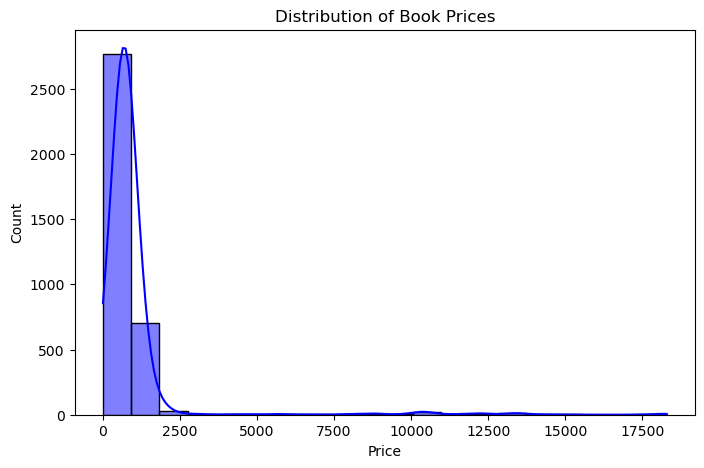

In [63]:
# Distribution of Book Prices
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Price'], bins=20, kde=True, color='blue')
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

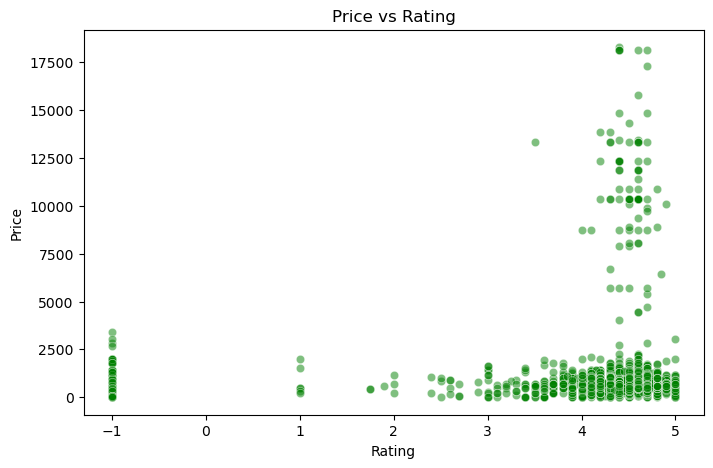

In [64]:
# Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_df['Rating'], y=merged_df['Price'], alpha=0.5, color='green')
plt.title("Price vs Rating")
plt.show()


##### Listening Time(Minutes) Analysis


In [65]:
# Summary statistics for listening time
print(merged_df['Listening Time (Minutes)'].describe())

count    3593.000000
mean      547.399805
std       407.130550
min         0.000000
25%       463.000000
50%       486.500000
75%       503.000000
max      6139.000000
Name: Listening Time (Minutes), dtype: float64


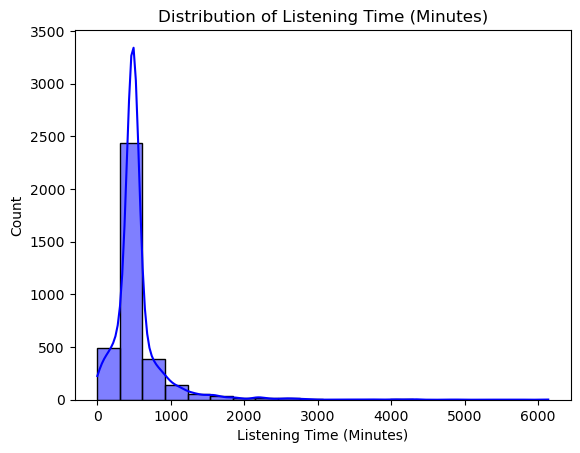

In [66]:
# Distribution of listening time
sns.histplot(merged_df['Listening Time (Minutes)'], bins=20, kde = True,color='blue')
plt.title("Distribution of Listening Time (Minutes)")
plt.show()

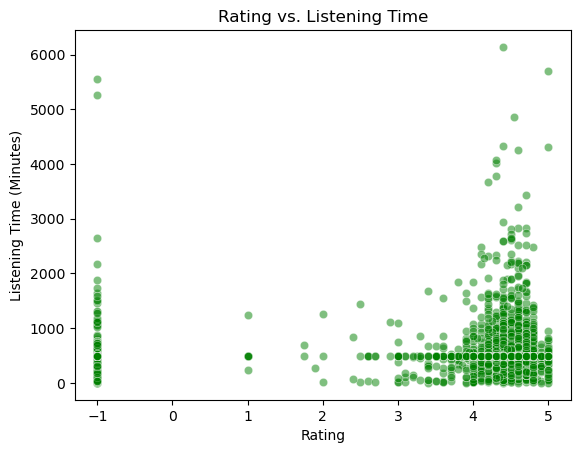

In [67]:
# Scatter plot of listening time vs rating
sns.scatterplot(x='Rating', y='Listening Time (Minutes)', data=merged_df, alpha=0.5, color='green')
plt.title("Rating vs. Listening Time")
plt.show()

##### Rank Analysis

In [68]:
#  Summary Statistics for Rank
print(merged_df['Rank'].describe())

count    3593.000000
mean       73.085166
std       199.787009
min        -1.000000
25%        -1.000000
50%         1.000000
75%         3.000000
max       999.000000
Name: Rank, dtype: float64


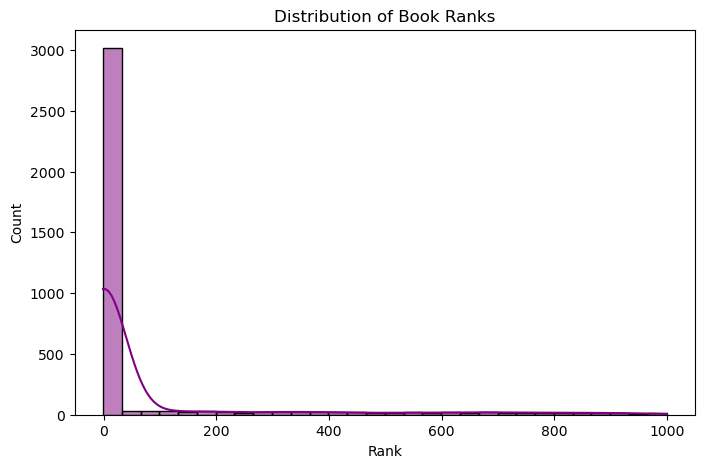

In [69]:
# Distribution of Book Ranks
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Rank'], bins=30, kde=True, color='purple')
plt.title("Distribution of Book Ranks")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

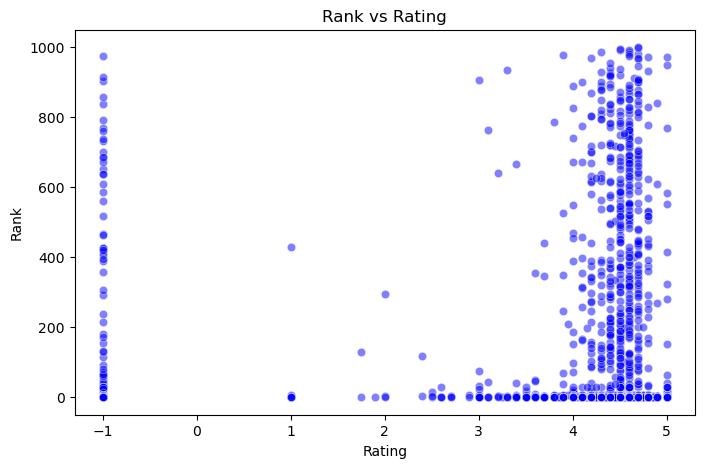

In [70]:
# Rank vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_df['Rating'], y=merged_df['Rank'], alpha=0.5, color='blue')
plt.title("Rank vs Rating")
plt.show()


##### Genre Analysis 

In [71]:
merged_df['Genre'].isnull().sum()

1703

In [72]:
# Count books per genre
top_genres = merged_df['Genre'].value_counts().head(10)
top_genres

Genre
als)                                     198
Personal Development & Self-Help         134
Textbooks & Study Guides                 102
Analysis & Strategy                       88
Personal Success                          57
Biographies & Autobiographies (Books)     52
g                                         50
Contemporary Fiction (Books)              46
Crime, Thriller & Mystery (Books)         40
Romance (Books)                           35
Name: count, dtype: int64

In [73]:
# Define invalid genres (manually identified)
invalid_genres = ["Unknown", "als)", "g"]


In [74]:
# Remove rows with invalid genres
df_cleaned = merged_df[~merged_df['Genre'].isin(invalid_genres)]


In [75]:
cleaned_top_genres = df_cleaned['Genre'].value_counts()

In [76]:
# Check cleaned genre distribution
print(cleaned_top_genres.head(10))

Genre
Personal Development & Self-Help         134
Textbooks & Study Guides                 102
Analysis & Strategy                       88
Personal Success                          57
Biographies & Autobiographies (Books)     52
Contemporary Fiction (Books)              46
Crime, Thriller & Mystery (Books)         40
Romance (Books)                           35
Classic Fiction (Books)                   30
d, Body & Spirit                          30
Name: count, dtype: int64


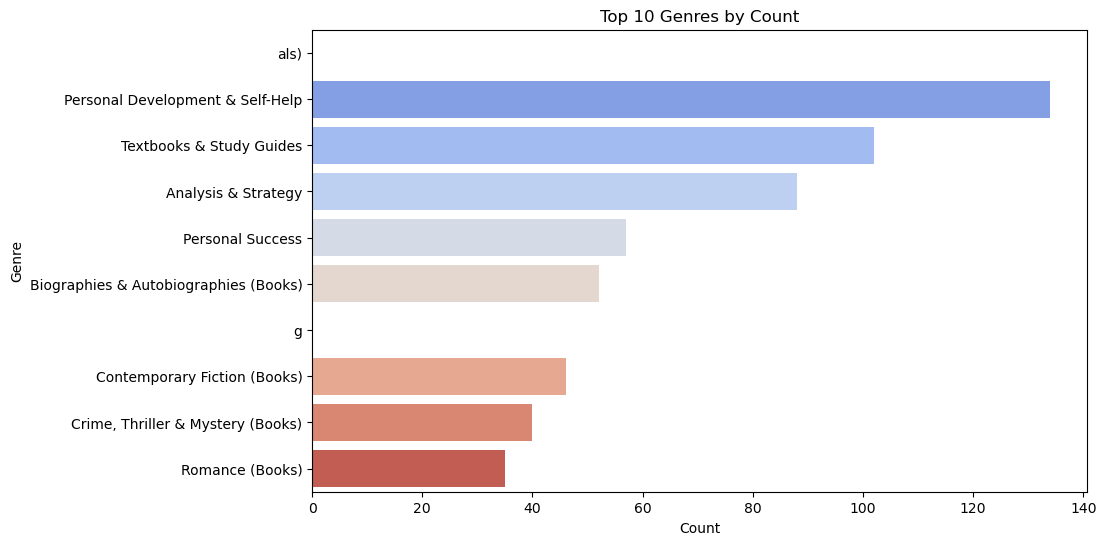

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_cleaned['Genre'], order=top_genres.index[:10], palette="coolwarm")
plt.title("Top 10 Genres by Count")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [78]:
#  Percentage of books in each genre
genre_percentage = top_genres / len(df_cleaned) * 100  # Convert to percentage
top_10_percentage = genre_percentage.head(10)  # Get the top 10 genres


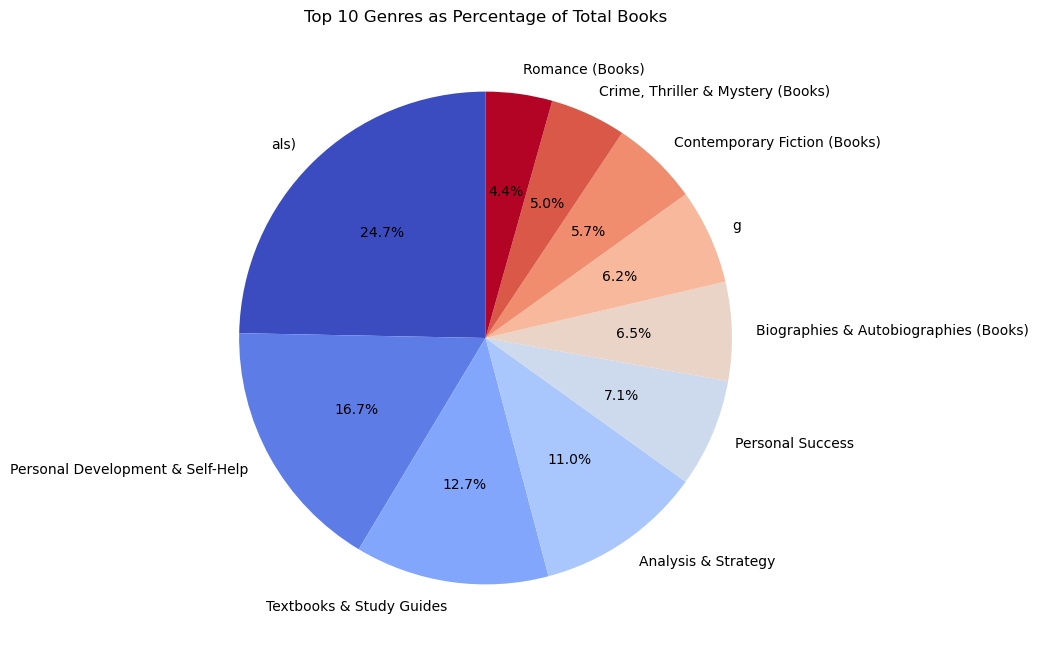

In [79]:
plt.figure(figsize=(8,8))
top_10_percentage.plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm', startangle=90)
plt.title("Top 10 Genres as Percentage of Total Books")
plt.ylabel("")  # Hide the y-label for better visuals
plt.show()

In [80]:
merged_df.columns

Index(['Book Name', 'Author', 'Description', 'Rating', 'Number of Reviews',
       'Price', 'Listening Time (Minutes)', 'Rank', 'Genre',
       'Book Name Length', 'Description Length'],
      dtype='object')

In [81]:
merged_df.drop(columns=['Description Length','Book Name Length'], inplace=True)

In [82]:
merged_df.columns

Index(['Book Name', 'Author', 'Description', 'Rating', 'Number of Reviews',
       'Price', 'Listening Time (Minutes)', 'Rank', 'Genre'],
      dtype='object')

In [83]:
merged_df.shape

(3593, 9)

#### Correlation Matrix

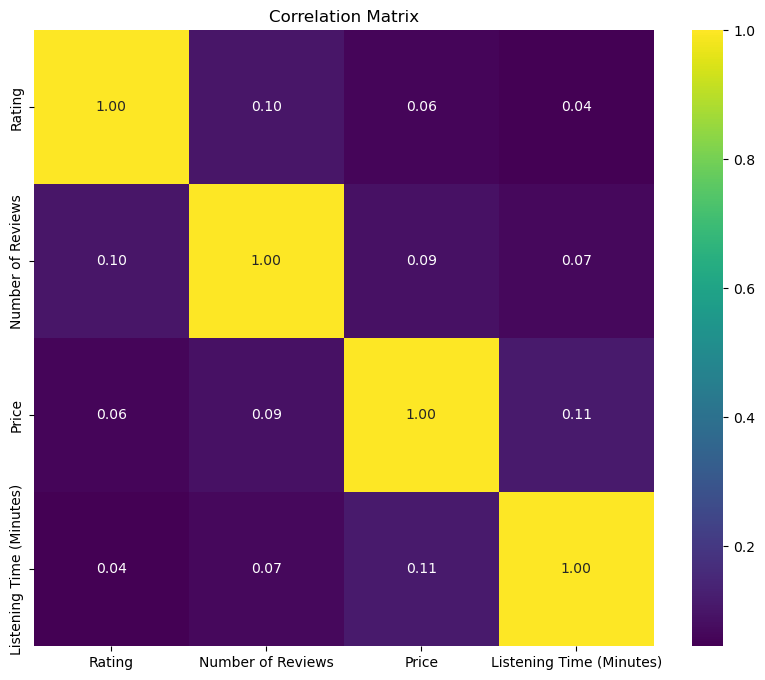

In [84]:
numerical_df = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**Observation:**  
The correlation matrix shows that there is very weak correlation among the numerical features in the dataset. The highest positive correlation is between Price and Listening Time (0.11), indicating that longer audiobooks may cost slightly more. Rating has a weak positive correlation with Number of Reviews (0.10), suggesting that more popular books tend to have slightly better ratings. Overall, the low correlation values indicate that these features are mostly independent of each other.


In [85]:
merged_df.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books)
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,335.0,5,Personal Success
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,385.0,6,Spiritualism


In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3593 non-null   object 
 1   Author                    3593 non-null   object 
 2   Description               3593 non-null   object 
 3   Rating                    3593 non-null   float64
 4   Number of Reviews         3593 non-null   float64
 5   Price                     3593 non-null   float64
 6   Listening Time (Minutes)  3593 non-null   float64
 7   Rank                      3593 non-null   int32  
 8   Genre                     1890 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 266.7+ KB


In [87]:
# Finding the most frequent genre
most_frequent_genre = merged_df['Genre'].mode()[0]

In [88]:
# Filling Missing Genres
merged_df['Genre'].fillna(most_frequent_genre, inplace=True)


In [89]:
# Checking if missing values were filled
print(merged_df['Genre'].isnull().sum())

0


In [90]:
merged_df['Genre'].value_counts()

Genre
als)                                1901
Personal Development & Self-Help     134
Textbooks & Study Guides             102
Analysis & Strategy                   88
Personal Success                      57
                                    ... 
Crime Fiction                          1
Astrology (Books)                      1
ation Studies                          1
gs for Children                        1
Diabetes                               1
Name: count, Length: 317, dtype: int64

In [91]:
invalid_genres = ['als)', 'g']

In [92]:
merged_df = merged_df[~merged_df['Genre'].isin(invalid_genres)]


In [93]:
# Create a dictionary for corrections
genre_corrections = {
    'd, Body & Spirit': 'Mind, Body & Spirit',
    'ation Studies': 'Education Studies',
    'gs for Children': 'Books for Children',
}

# Replace the corrupted genre names using the mapping
merged_df['Genre'] = merged_df['Genre'].replace(genre_corrections)

# Verify correction
print(merged_df['Genre'].value_counts().head(10))


Genre
Personal Development & Self-Help         134
Textbooks & Study Guides                 102
Analysis & Strategy                       88
Personal Success                          57
Biographies & Autobiographies (Books)     52
Contemporary Fiction (Books)              46
Crime, Thriller & Mystery (Books)         40
Romance (Books)                           35
Classic Fiction (Books)                   30
Mind, Body & Spirit                       30
Name: count, dtype: int64


In [94]:
merged_df.shape

(1642, 9)

In [96]:
merged_df.to_csv("cleaned_data.csv", index = False)

The cleaned and preprocessed dataset was saved as a CSV file `"cleaned_data.csv"`.